In [2]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

In [3]:
def nash_equilibrium(a):
    m, n = a.shape

    # Понижаем все значения, чтобы минимальное было 1 или больше
    min_el = a.min()
    if min_el < 1:
        a -= min_el - 1

    # Ищем стратегию для первого игрока
    c = np.ones(m)
    b = -np.ones(n)
    A_ub = -a.T
    res = linprog(c=c, A_ub=A_ub, b_ub=b)
    if not res.success:
        raise ValueError("Не удалось найти оптимальную стратегию для первого игрока.")
    p = res.x
    u = 1 / p.sum()  # общее значение выигрыша
    p *= u  # нормализуем стратегию

    # Ищем стратегию для второго игрока
    c = -np.ones(n)
    b = np.ones(m)
    A_ub = a
    res = linprog(c=c, A_ub=A_ub, b_ub=b)
    if not res.success:
        raise ValueError("Не удалось найти оптимальную стратегию для второго игрока.")
    q = res.x
    q *= u  # нормализуем стратегию

    # Корректируем общее значение выигрыша
    u += min_el - 1

    return u, p, q

In [4]:
def visualization(p):
    plt.figure(figsize=(8, 4))
    plt.axis([0, len(p) + 1, 0, max(p) + 0.1])  # Увеличим запас по высоте, чтобы ошибки округления предотвратить
    plt.xlabel('Стратегии')
    plt.ylabel('Вероятность')
    plt.title('Распределение вероятностей стратегий')

    for i in range(len(p)):
        plt.scatter(i + 1, p[i], alpha=0.5, color='b', zorder=3)
        plt.bar(i + 1, p[i], alpha=0.3, color='gray', width=0.3, zorder=2)

    plt.xticks(range(1, len(p) + 1))
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

In [5]:
def main(a):
    u, p, q = nash_equilibrium(a)
    visualization(p)
    visualization(q)
    print("value of the game is ", u)

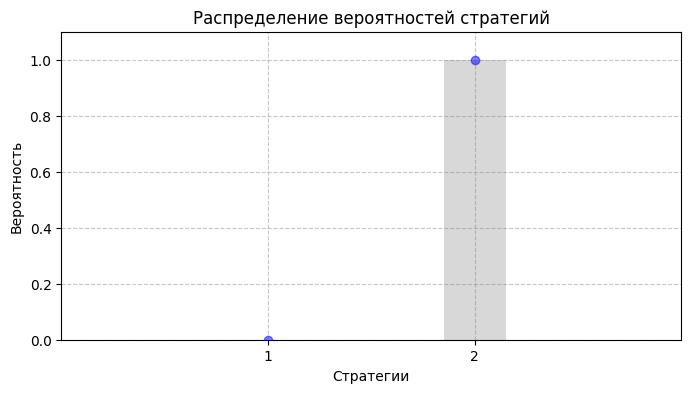

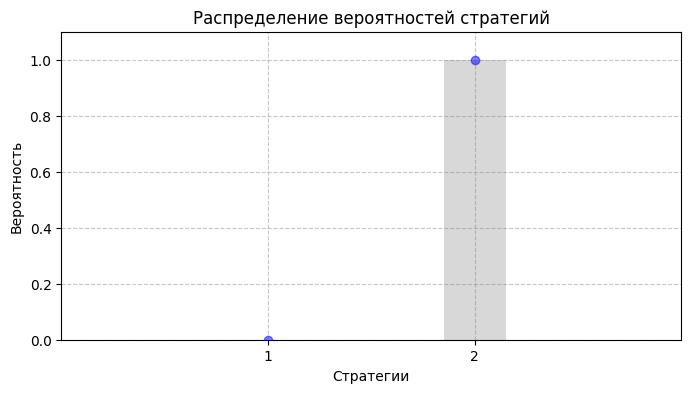

value of the game is  0.0


In [6]:
# Пример №1
a = np.array([[5,0],
              [6,0]])
main(a)

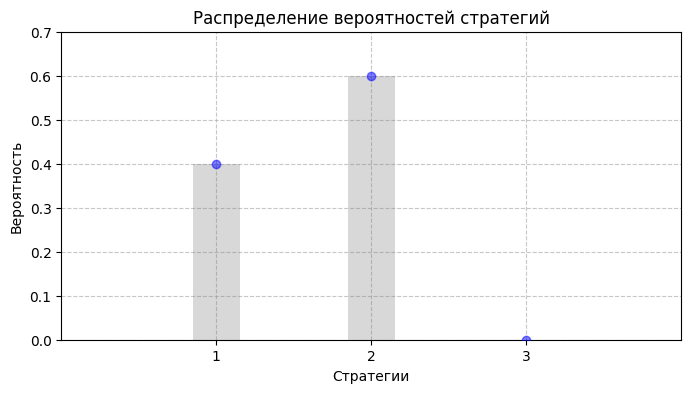

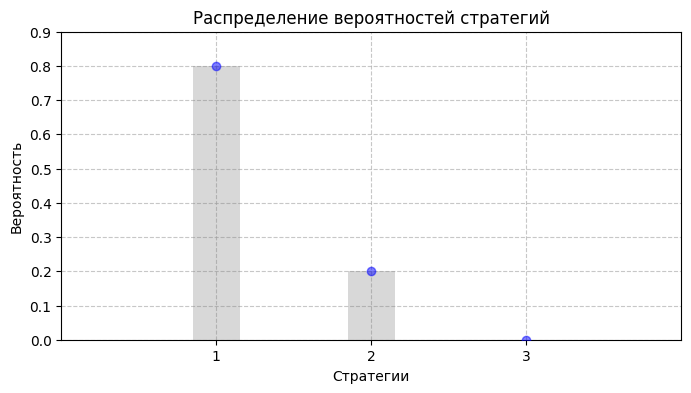

value of the game is  5.6


In [7]:
# Пример №2
a = np.array([[5, 8, 10],
              [6, 4, 10],
              [0, 0, 0]])
main(a)

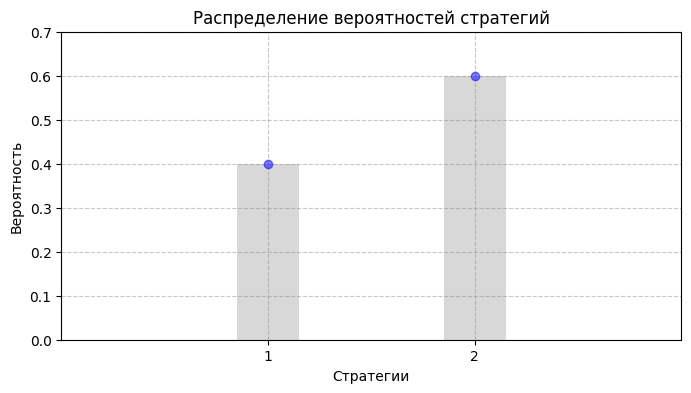

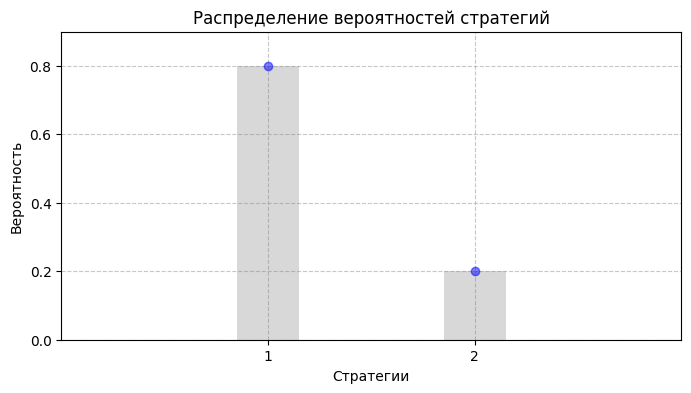

value of the game is  8.600000000000001


In [13]:
# Пример №3
a = np.array([[5, 8],
              [6, 4]])
main(a)

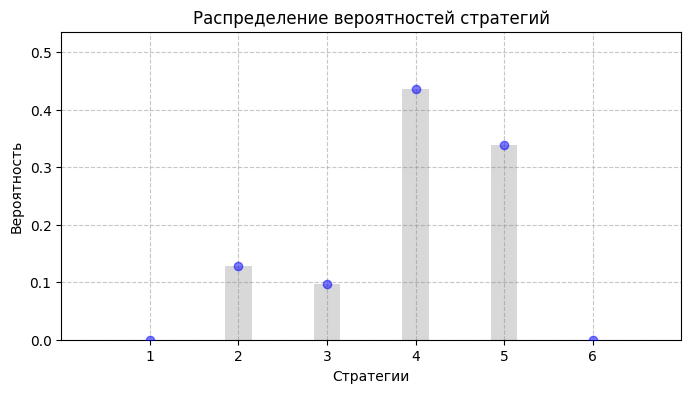

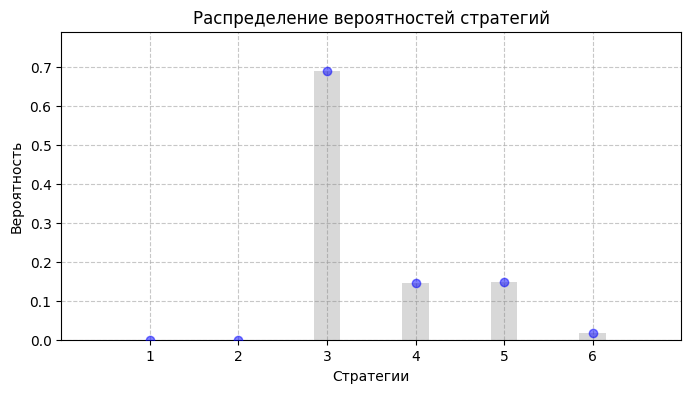

value of the game is  4.870967741935484


In [10]:
# Пример из задания
a = np.array([[4, 0, 6, 2,  2, 1],
              [3, 8, 4, 10,  4, 4],
              [1, 2, 6, 5, 0, 0],
              [6, 6, 4,  4, 10, 3],
              [10, 4, 6, 4, 0, 9],
              [10, 7, 0, 7, 9, 8]])
main(a)